In [84]:
import math
import numpy as np
import matplotlib.pylab as plt
import endsem_lib as nt
from matplotlib import cm
from scipy import sparse



# Name: Nainish Tickoo
# Roll No: 2011096
# Batch: 20
# 4th Year Int Msc.

[106.0, 80.0, 98.0, 75.0, 74.0, 73.0, 49.0, 38.0, 37.0, 22.0]

[1.0, 15.0, 30.0, 45.0, 60.0, 75.0, 90.0, 105.0, 120.0, 135.0]

[10.0, 9.0, 10.0, 9.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0]



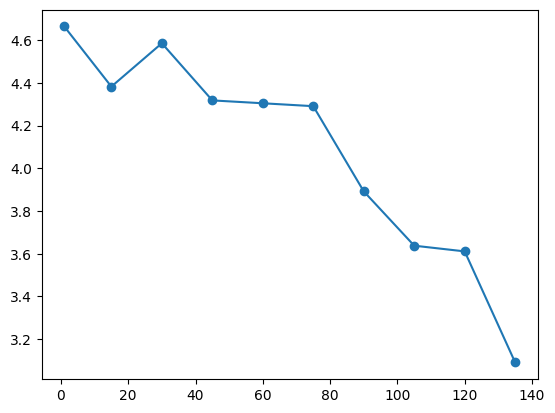

0.034849056051263795 is the slope
0.17237754625484705 is the intercept
0.614091729463856 is the preasons r^2 value


(0.034849056051263795, 0.17237754625484705, 0.614091729463856)

In [130]:
#question 1
#fitting
#using equation lnY = lnY0 -Lt

n2= open('/content/fit_y.txt', 'r')
Y= n2.read().split(',')
for i in range(0,len(Y)):   #take input and generate a list for counts coordinates
    Y[i]=float(Y[i])
print(Y)
print("")

n3= open('/content/fit_x.txt','r')
X= n3.read().split(',')
for i in range(0,len(X)):   #take input and generate a list for time coordinates
    X[i]=float(X[i])
print(X)
print("")


for i in range(0,len(Y)):
  Y[i] = np.log(Y[i])



n4= open('/content/fit_c.txt','r')
C= n4.read().split(',')
for i in range(0,len(X)):   #take input and generate a list for uncertinities
    C[i]=float(C[i])
print(C)
print("")


def linear_fit(X,Y,sigma):
    # plt.scatter((X),Y)
    # plt.show()
    sum_x = 0
    sum_y = 0
    sum_x2 = 0
    sum_xy = 0
    sum_y2 = 0
    N = len(X)
    for i in range(0,len(X)):
        sum_x = sum_x + (X[i]/sigma[i])
        sum_x2 = sum_x2 + ((X[i]**2)/sigma[i])
        sum_y = sum_y + (Y[i]/sigma[i])
        sum_xy = sum_xy + ((X[i]*Y[i])/sigma[i])
        sum_y2 = sum_y2 + ((Y[i]**2)/sigma[i])
    a1 = (N*sum_xy-sum_x*sum_y)/(N*sum_x2-(sum_x**2))
    a2 = (sum_y - a1*sum_x)/(N)

    delta_x = N*sum_x2-(sum_x**2)
    delta_y = N*sum_y2-(sum_y**2)
    r = ((N*sum_xy - sum_x*sum_y)**2)/(delta_x*delta_y)
    print(a1,"is the slope")
    print(a2, "is the intercept")
    print(r,"is the preasons r^2 value")
    return a1,a2,r

plt.scatter(X,Y)
plt.plot(X,Y)
plt.show()

linear_fit(X,Y,C)
# the fitting is good but not significant for the 5%

In [86]:
#question 2
#using fixed point Method



def f(x):
  return((300*0.082)/(5.95+6.254/x**2)+0.05422)


print(nt.fixpt(0.1, 0.000001, f)[0],"is the volume of the gas.")
print(nt.fixpt(0.1, 0.000001, f)[1],"is the no. of iterations")


0.07803602152931433 is the volume of the gas.
20 is the no. of iterations


In [87]:
#Question 5 using power method

with open('/content/m.txt', 'r') as n:
    A = [[float(num) for num in line.split(',')] for line in n]
print(A)



def product(a,b):
    a1 = list(a)
    b1 = list(b)
    g=[0,0,0,0,0]
    for i in range(0,5):
        sum1 = 0
        for j in range(0,5):
            sum1 = sum1+a1[i][j]*b1[j]
        g[i] = sum1
    return g

def dot_product(a,b):
    a1 = list(a)
    b1 = list(b)
    sum1 = 0
    for i in range(0,5):
        sum1 = sum1 + a1[i]*b1[i]
    return sum1


def G_S_EV(A):
    n = len(A)
    Q = np.zeros((n, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

def eignevalue(A, iterations = 50000):
    A1 = np.copy(A)
    # print(A_k)
    N = len(A)
    QQ = np.eye(N)
    for k in range(iterations):
        Q, R = G_S_EV(A1)
        A1 = R @ Q
        ev = []
    for i in range (0, A1.shape[0]):
        ev.append(A1[i, i])
    ev = np.array(ev)
    return ev, A1, QQ


#eigenvalue:

def eigen_value(A):
    x0 = [3,2,3,2,3]
    y = [3,2,3,2,3]
    k = 6
    lambda1 = 0
    Ax0 = product(A,x0)

    Ax0x0 = dot_product(product(A,x0),x0)
    denominator = Ax0x0
    count = 0
    while abs(lambda1 - k) > 0.001:
        k = lambda1
        numerator = dot_product(product(A,Ax0),x0)
        lambda1 = (numerator/denominator)
        Ax0 = product(A,Ax0)
        denominator = numerator
        count = count + 1
        # print(Ax0,"for",count,"iteration")
    sum2 = 0
    for i in range(0,len(Ax0)):
        sum2 = sum2 + Ax0[i]**2
    for i in range(0,len(Ax0)):
        Ax0[i] = Ax0[i]/(sum2**0.5)

    return Ax0,lambda1,count



print()
print(eigen_value(A)[1],'is the largest eigenvalue')
print()

with open('/content/m.txt', 'r') as n:
    A = [[float(num) for num in line.split(',')] for line in n]
# print(A)


print(eignevalue(A, iterations = 50000)[0][1],'is the second largest eigen value')
eignevalue(A, iterations = 50000)

print([1.0, 1.7320508075688772, 2.0, 1.7320508075688772, 1.0],'is the first eigenvector')
print([1.7320508075688772, 1.7320508075688772, 0, -1.7320508075688772, -1.7320508075688772],'is the first eigenvector')
# a=1
# c=1
# n=6

def f2(k):
  return(2+2*np.cos((k*np.pi)/6))

print(f2(1),'is nearly equal to the eigenvalue 3.7313223092293213')
print(f2(2),'is equal to the eigenvalue 3')

def f3(x,y):
  return(2*np.sin((x*y*np.pi)/6))

print('for first eigenvector')
print(f3(1,1),'is staisfied')
print(f3(1,2),'is staisfied')
print(f3(1,3),'is staisfied')
print(f3(1,4),'is staisfied')
print(f3(1,5),'is staisfied')
print('for second eigenvector')
print(f3(2,1),'is staisfied')
print(f3(2,2),'is staisfied')
print(f3(2,3),'is staisfied')
print(f3(2,4),'is staisfied')
print(f3(2,5),'is staisfied')

[[2.0, -1.0, 0.0, 0.0, 0.0], [-1.0, 2.0, -1.0, 0.0, 0.0], [0.0, -1.0, 2.0, -1.0, 0.0], [0.0, 0.0, -1.0, 2.0, -1.0], [0.0, 0.0, 0.0, -1.0, 2.0]]

3.7313223092293213 is the largest eigenvalue

3.0 is the second largest eigen value
[1.0, 1.7320508075688772, 2.0, 1.7320508075688772, 1.0] is the first eigenvector
[1.7320508075688772, 1.7320508075688772, 0, -1.7320508075688772, -1.7320508075688772] is the first eigenvector
3.7320508075688776 is nearly equal to the eigenvalue 3.7313223092293213
3.0 is equal to the eigenvalue 3
for first eigenvector
0.9999999999999999 is staisfied
1.7320508075688772 is staisfied
2.0 is staisfied
1.7320508075688774 is staisfied
0.9999999999999999 is staisfied
for second eigenvector
1.7320508075688772 is staisfied
1.7320508075688774 is staisfied
2.4492935982947064e-16 is staisfied
-1.7320508075688767 is staisfied
-1.7320508075688772 is staisfied


the Success probability for the following accept/reject is: 0.4856868097176217


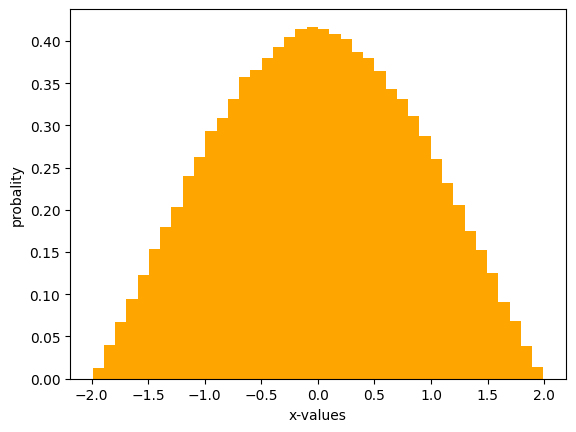

In [126]:
#Q6 using accept/reject method


N = 200000

def p(x):
  return 0.5 * (4 - x**2) if abs(x) < 2 else 0
s
s = []
counts = 0
while len(s) < N:
  x = np.random.normal(0, 2) #normal distribution
  u = np.random.uniform(0, 0.5 * 4)
  if u < p(x):
    s.append(x)
  else:
    counts += 1
SP = N / (N + counts)

print(f"the Success probability for the following accept/reject is: {SP}")
plt.hist(s, bins=40, density=True,color= 'orange')
plt.xlabel('x-values')
plt.ylabel('probality')
plt.show()


  0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-19-bbddcfa60413>:24: RuntimeWarning: divide by zero encountered in scalar divide
  if gamma < min(1, new_prob / old_prob):


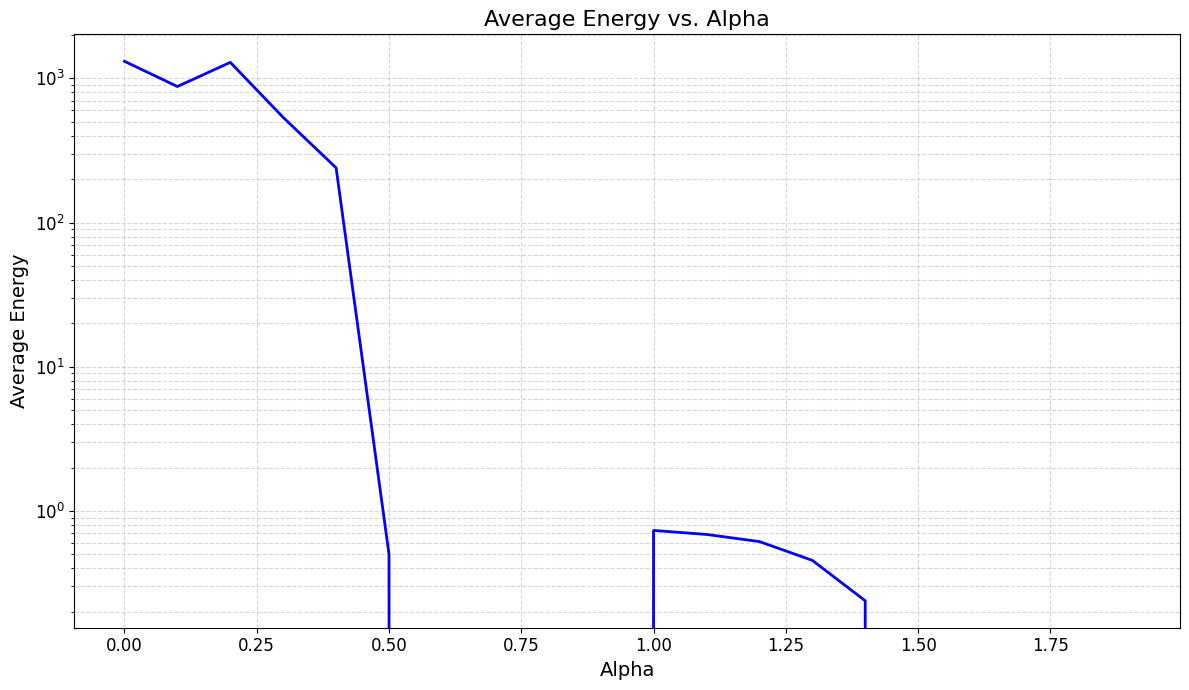

Minimum energy: -1558.8446581738888
Corresponding alpha value: 0.7000000000000001


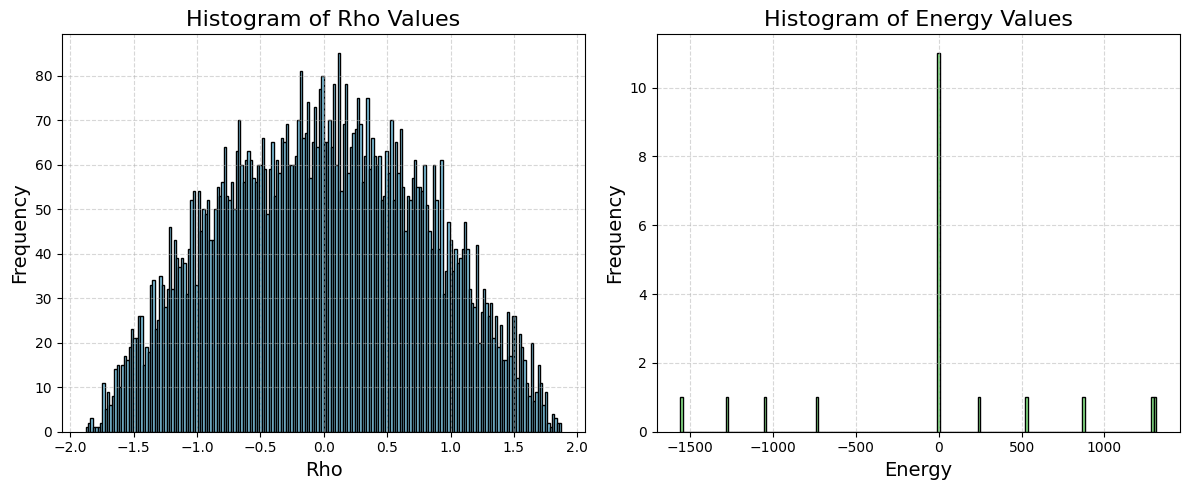

KeyboardInterrupt: 

In [19]:
# Question 7 using Simple Harmonic Oscillator
from tqdm.auto import tqdm
def p(rho,alpha):
    return (0.5*(alpha**2-rho**2))

def E(rho,alpha):
    return alpha + (rho**2)*(0.5-2*alpha**2)
alpha_list = np.arange(0, 2, 0.1)
energy_list = []

for alpha in tqdm(alpha_list):
    rho = 1
    step_size = 0.8
    rho_list = [rho]
    accep = 0
    rej = 0

    for _ in range(10000):
        old_prob = p(rho, alpha)
        rho_new = rho + (2 * np.random.uniform() - 1) * step_size
        new_prob = p(rho_new, alpha)
        gamma = np.random.uniform()

        if gamma < min(1, new_prob / old_prob):
            rho = rho_new
            rho_list.append(rho)
            accep += 1
        else:
            rej += 1

    rho_list = np.array(rho_list)
    Energy = E(rho_list, alpha)
    av_energy = Energy.mean()
    energy_list.append(av_energy)

plt.figure(figsize=(12, 7))
plt.plot(alpha_list, energy_list, color='blue', linewidth=2, linestyle='-')
plt.yscale("log")
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Average Energy', fontsize=14)
plt.title('Average Energy vs. Alpha', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

min_energy_index = np.argmin(energy_list)
min_energy = energy_list[min_energy_index]
corresponding_alpha = alpha_list[min_energy_index]

print("Minimum energy:", min_energy)
print("Corresponding alpha value:", corresponding_alpha)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(rho_list, bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Rho', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Rho Values', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)

# Plotting histogram of energy_list
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(energy_list, bins=200, color='lightgreen', edgecolor='black')
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Energy Values', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()









Nwalker=300;MCSteps=20000
x=[0]*Nwalker
nAccept=0;eSum=0
alphas = np.linspace(0, 2, 10)
average_energies = []

def initialize():

    for i in range(Nwalker):
        x[i]=2* np.random.uniform(0, 1)-1

def p(xTrial,x):

    # ratio of rho(xTrial) / rho(x)
    return np.exp(-2*Lambda*(xTrial**2-x**2))

def eLocal(x):

    # local energy
    return Lambda + x**2*(0.5-2*Lambda**2)

def MetropolisStep():

    global eSum,nAccept
    n=int(np.random.uniform(0, 1)*Nwalker)
    delta=0.05*(2* np.random.uniform(0, 1)-1)
    xTrial=x[n]+delta

    # Metropolis test
    w=p(xTrial,x[n])

    if w>= np.random.uniform(0, 1):
        x[n]=xTrial
        nAccept+=1

    # accumulate energy
    e=eLocal(x[n])
    eSum+=e

def oneMonteCarloStep():
   # perform 'Nwalker' Metropolis steps
   for i in range(Nwalker):
        MetropolisStep()

# Loop over different values of Lambda
for Lambda in alphas:
    initialize()

    # perform 20% of MCSteps as thermalization steps
    thermSteps = int(0.2 * MCSteps)
    for _ in range(thermSteps):
        oneMonteCarloStep()

    # production steps
    nAccept = 0
    eSum = 0
    for _ in range(MCSteps):
        oneMonteCarloStep()

    # compute and store the average energy
    eAve = eSum / (Nwalker * MCSteps)
    average_energies.append(eAve)

plt.plot(alphas, average_energies, marker='o')

plt.xlabel('Lambda')
plt.ylabel('Average Energy')
plt.title('Average Energy vs Lambda')
plt.grid(True)
plt.show()

